<a href="https://colab.research.google.com/github/seomj0914/MyStudy/blob/main/%EC%84%A0%ED%98%95%EB%8B%A8%EC%88%9C%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

result=pd.read_csv("/content/다중회귀.csv")
result=result[["외관","유용성","편의성","만족감"]]
print(result)

#x=result[["외관","유용성","편의성"]]
#y=result[["만족감"]]

       외관  유용성   편의성   만족감
0    4.00  2.8  3.00  3.00
1    5.00  1.0  3.00  5.00
2    4.67  3.0  3.00  4.00
3    5.00  1.6  4.00  3.00
4    5.00  3.2  3.00  5.00
..    ...  ...   ...   ...
320  1.00  1.0  1.50  1.33
321  4.67  3.0  3.75  3.00
322  1.00  2.2  3.00  2.33
323  5.00  3.0  4.50  5.00
324  1.00  1.0  1.50  1.33

[325 rows x 4 columns]


In [6]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
#ols=> 최소 자승법(Ordinary Least Square) : 선형회귀 그릴때 그 점들 사이의 값을 최소로 계산하기 위해 
lr=ols("만족감~외관+유용성+편의성",data=result).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    만족감   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     33.21
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           1.01e-18
Time:                        01:31:27   Log-Likelihood:                -294.47
No. Observations:                 325   AIC:                             596.9
Df Residuals:                     321   BIC:                             612.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4583      0.197      7.389      0.0

Durbin-Watson : 잔차가 독립적인지 보는거 1.5~2.5사이가 좋음

#다중공선성 확인

In [7]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y,x=dmatrices("만족감~외관+유용성+편의성",result, return_type='dataframe')
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["feature"]=x.columns
print("x.shape", x.shape[1])
print("x.columns",x.columns)
vif

x.shape 4
x.columns Index(['Intercept', '외관', '유용성', '편의성'], dtype='object')


,VIF Factor,feature
0,34.871388,Intercept
1,1.067794,외관
2,1.053532,유용성
3,1.053753,편의성


In [34]:
x=[-3,31,-11,4,0,22,-2,-5,-25,-14]
y=[-2,32,-10,5,1,23,-1,-4,-24,-13]

print(x)
print(y)

[-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]
[-2, 32, -10, 5, 1, 23, -1, -4, -24, -13]


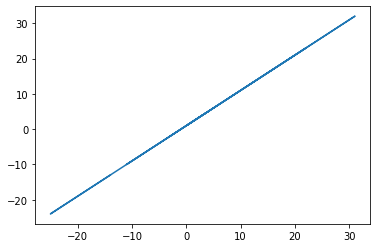

In [35]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.show()

In [36]:
import pandas as pd
df=pd.DataFrame({'x':x,'y':y})
df.shape

(10, 2)

In [37]:
df.head()

,x,y
0,-3,-2
1,31,32
2,-11,-10
3,4,5
4,0,1


In [38]:
df.tail()

,x,y
5,22,23
6,-2,-1
7,-5,-4
8,-25,-24
9,-14,-13


In [39]:
train_features=['x']
target_cols=['y']

x_train=df.loc[:,train_features]
y_train=df.loc[:,target_cols]

print(x_train)
print(y_train)

    x
0  -3
1  31
2 -11
3   4
4   0
5  22
6  -2
7  -5
8 -25
9 -14
    y
0  -2
1  32
2 -10
3   5
4   1
5  23
6  -1
7  -4
8 -24
9 -13


In [40]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
print(lr.coef_[0][0]) #기울기
print(lr.intercept_[0]) #상수항

0.9999999999999999
0.9999999999999999


# *예측*

In [45]:
import numpy as np

new = np.arange(11,20,1).reshape(-1,1)

y_new=lr.predict(new)
y_new

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])